In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

 

In [2]:
dataset=r'C:\Users\hp\Downloads\dataset-20201027T091737Z-001\dataset'
imagePaths=list(paths.list_images(dataset))

In [3]:
imagePaths

['C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0.jpg',
 'C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0_0_aidai_0014.jpg',
 'C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0_0_aidai_0029.jpg',
 'C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0_0_aidai_0043.jpg',
 'C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0_0_aidai_0074.jpg',
 'C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0_0_aidai_0084.jpg',
 'C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0_0_aidai_0136.jpg',
 'C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0_0_anhu_0004.jpg',
 'C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0_0_anhu_0020.jpg',
 'C:\\Users\\hp\\Downloads\\dataset-20201027T091737Z-001\\dataset\\without_mask\\0_0_anhu_0025.jp

In [4]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)
   

C:\Users\hp\miniconda3\envs\tensorflow\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [5]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.3803922 , -0.9607843 

In [6]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [7]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [8]:
data.shape

(3833, 224, 224, 3)

In [9]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [10]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [11]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [13]:
train_X.shape

(3066, 224, 224, 3)

In [14]:
train_Y.shape

(3066, 2)

In [15]:
test_X.shape

(767, 224, 224, 3)

In [16]:
test_Y.shape

(767, 2)

In [17]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [18]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

C:\Users\hp\miniconda3\envs\tensorflow\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 48s 5us/step


In [19]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [20]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))


model=Model(inputs=baseModel.input,outputs=headModel)

In [24]:
for layer in baseModel.layers:
    layer.trainable=False

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [26]:
learning_rate=0.001
Epochs=20
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)

  ...
    to  
  ['...']
Train for 255 steps, validate on 767 samples
Epoch 1/20
255/255 [==============================] - 582s 2s/step - loss: 0.2365 - accuracy: 0.9057 - val_loss: 0.2632 - val_accuracy: 0.9127
Epoch 2/20
255/255 [==============================] - 817s 3s/step - loss: 0.2255 - accuracy: 0.9139 - val_loss: 0.4258 - val_accuracy: 0.8545
Epoch 3/20
255/255 [==============================] - 378s 1s/step - loss: 0.1880 - accuracy: 0.9244 - val_loss: 0.5230 - val_accuracy: 0.8399
Epoch 4/20
255/255 [==============================] - 357s 1s/step - loss: 0.2063 - accuracy: 0.9237 - val_loss: 0.2227 - val_accuracy: 0.9167
Epoch 5/20
255/255 [==============================] - 362s 1s/step - loss: 0.1804 - accuracy: 0.9361 - val_loss: 0.3739 - val_accuracy: 0.8704
Epoch 6/20
255/255 [==============================] - 372s 1s/step - loss: 0.1668 - accuracy: 0.9355 - val_loss: 0.5641 - val_accuracy: 0.8492
Epoch 7/20
255/255 [==============================] - 384s 2s/step - los

NotFoundError: Failed to create a directory: C:\Users\hp\Documents\ml project/mobilenet_v2.model; No such file or directory

In [27]:
model.save(r'C:\Users\hp\Documents\ml project\mobilenet_v2.model')

INFO:tensorflow:Assets written to: C:\Users\hp\Documents\ml project\mobilenet_v2.model\assets


In [28]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))


              precision    recall  f1-score   support

   with_mask       0.97      0.74      0.84       383
without_mask       0.79      0.98      0.87       384

    accuracy                           0.86       767
   macro avg       0.88      0.86      0.86       767
weighted avg       0.88      0.86      0.86       767



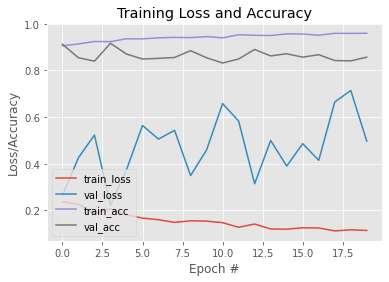

In [33]:
# plot the training loss and accuracy

N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(r'C:\Users\hp\Documents\ml project\plot_v2.png')
